In [1]:

# call __init_ to set notebook seed
import set_notebook_env
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu

from collections import defaultdict
import numpy as np

import set_notebook_env
loader, plot_utils = set_notebook_env.set_env(
    data_dir="../data/", 
    min_ratings=0, 
    max_ratings=None,
    drop_inconsistent_gender = True
)


Using seed: 18787288


In [2]:
loader.initial_setup()


,avg_rating,avg_difficulty,num_ratings,pepper,would_take_again_prop,num_online_ratings,male,female,tough_grader,good_feedback,...,test_heavy,few_things,amazing_lectures,caring,extra_credit,group_projects,lecture_heavy,major,university,state
0,3.2,3.0,4.0,0.0,NaN,0.0,1,0,2,1,...,0,0,0,0,0,0,0,English,Alabama State University,AL
1,3.5,3.3,22.0,0.0,56.0,7.0,1,0,8,13,...,0,0,0,3,0,1,3,English,Eastern Florida State College,FL
2,3.0,1.0,1.0,0.0,NaN,0.0,0,1,0,0,...,0,0,0,0,0,0,0,English,Colorado Mesa University,CO
3,4.5,3.0,1.0,0.0,NaN,0.0,0,1,0,0,...,0,0,0,0,0,0,0,Biology,Union County College,NJ
4,3.0,3.0,1.0,0.0,NaN,0.0,0,1,0,0,...,0,0,0,0,0,0,0,Biology,Louisiana State University of Alexandria,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52083,3.5,4.0,1.0,1.0,NaN,0.0,0,1,1,0,...,0,0,1,0,0,0,0,Psychology,University of Washington,WA
52084,5.0,1.5,2.0,0.0,NaN,0.0,0,1,0,0,...,0,0,0,2,0,1,0,English,Gannon University,PA
52085,3.9,3.8,4.0,1.0,NaN,0.0,0,1,2,0,...,0,0,1,1,0,0,0,Psychology,University of Ottawa,ON
52086,4.5,2.0,2.0,0.0,NaN,0.0,1,0,1,1,...,0,0,0,1,0,0,0,Theater,University of Winnipeg,MB


In [3]:
print(loader)
print(loader.cleaning_info)


        Capstone Data Loader
            - data source ../data
            - seed_value 18787288
            - min_ratings 0
            - max_rating None
            - drop_missing_ratings True
            - drop_inconsistent_gender True
        
{'dropped_low_rating_count': 19889, 'dropped_missing_ratings': 0, 'dropped_inconsistent_gender': 17915}


In [4]:
df = loader.cleaned_df
df.columns

Index(['avg_rating', 'avg_difficulty', 'num_ratings', 'pepper',
       'would_take_again_prop', 'num_online_ratings', 'male', 'female',
       'tough_grader', 'good_feedback', 'respected', 'lots_to_read',
       'participation_matters', 'no_skip', 'lots_of_hw', 'inspirational',
       'pop_quizzes', 'accessible', 'papers', 'clear_grading', 'hilarious',
       'test_heavy', 'few_things', 'amazing_lectures', 'caring',
       'extra_credit', 'group_projects', 'lecture_heavy', 'major',
       'university', 'state'],
      dtype='object')

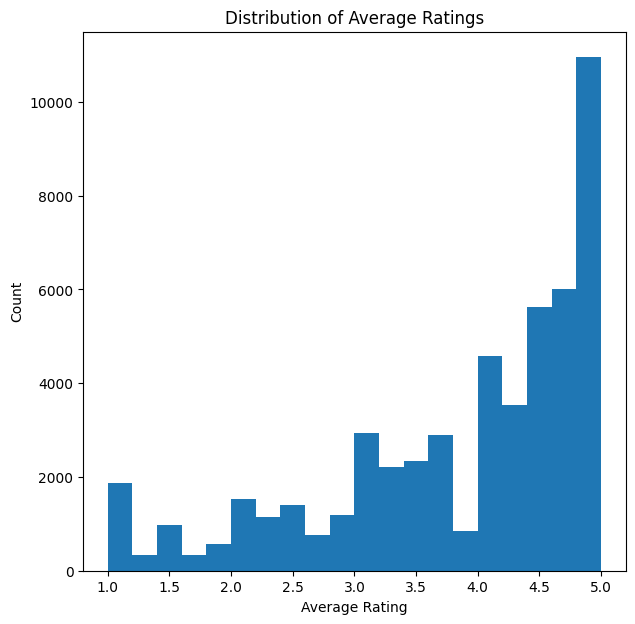

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(df["avg_rating"], bins=20)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Count")
ax.set_title("Distribution of Average Ratings")

plt.show()

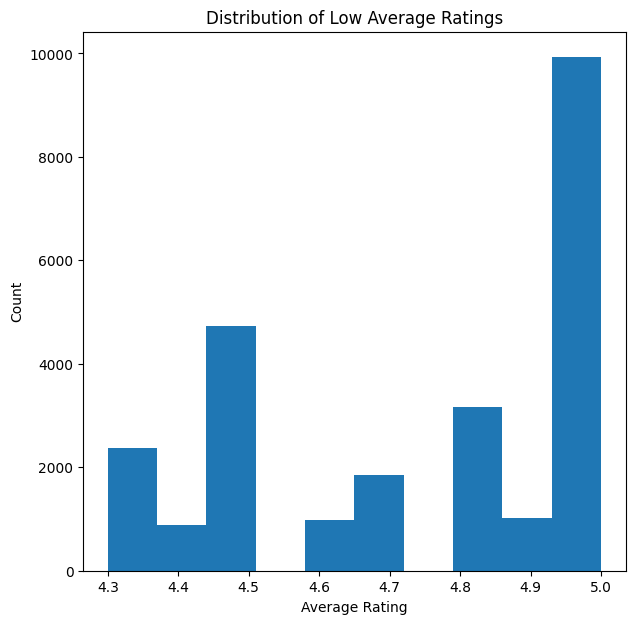

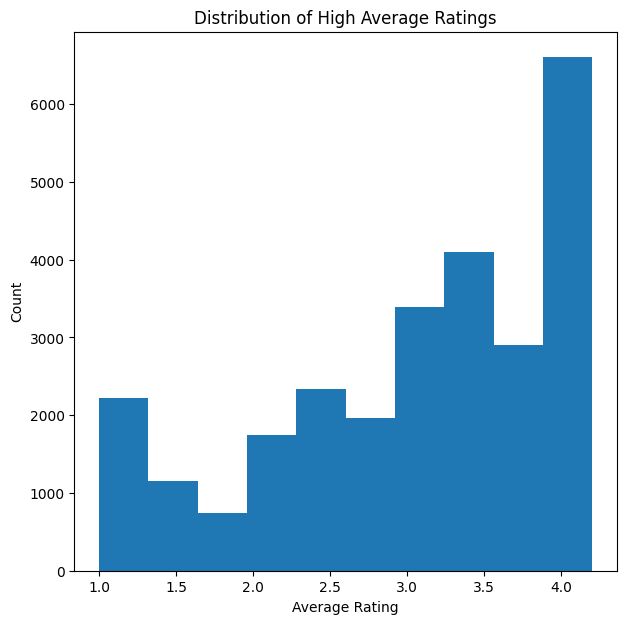

In [6]:
pivot = df["avg_rating"].median()

low = df[df["avg_rating"] > pivot]["avg_rating"]
high = df[df["avg_rating"] <= pivot]["avg_rating"]

fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(low, bins=10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Count")
ax.set_title("Distribution of Low Average Ratings")

plt.show()

fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(high, bins=10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Count")
ax.set_title("Distribution of High Average Ratings")

plt.show()

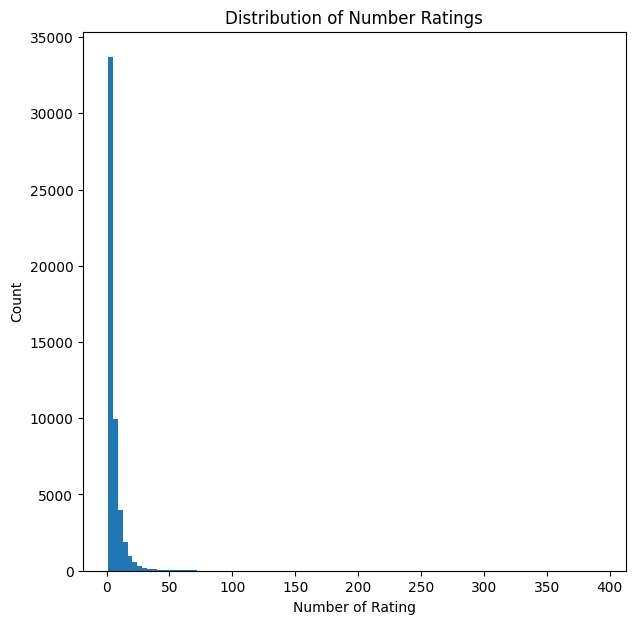

0.0


In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(df["num_ratings"], bins=100)

ax.set_xlabel("Number of Rating")
ax.set_ylabel("Count")
ax.set_title("Distribution of Number Ratings")


plt.show()


In [8]:
# female
female = df.loc[df["female"] == 1]

# male
male = df.loc[df["male"] == 1]

# both (inconsistent labels)
both = df.loc[(df["male"] == 1) & (df["female"] == 1)]

none = df.loc[(df["male"] == 0) & (df["female"] == 0)]

n = df.shape[0]

print(
    "=" * 40,
    f"""
    female shape   = {female.shape}
    male shape     = {male.shape}
    both shape     = {both.shape}
    none shape     = {none.shape}
    original shape = {df.shape}

    % female = {female.shape[0] / n:.2%}
    % male   = {male.shape[0] / n:.2%}
    """
)

    female shape   = (24925, 31)
    male shape     = (27163, 31)
    both shape     = (0, 31)
    none shape     = (0, 31)
    original shape = (52088, 31)

    % female = 47.85%
    % male   = 52.15%
    


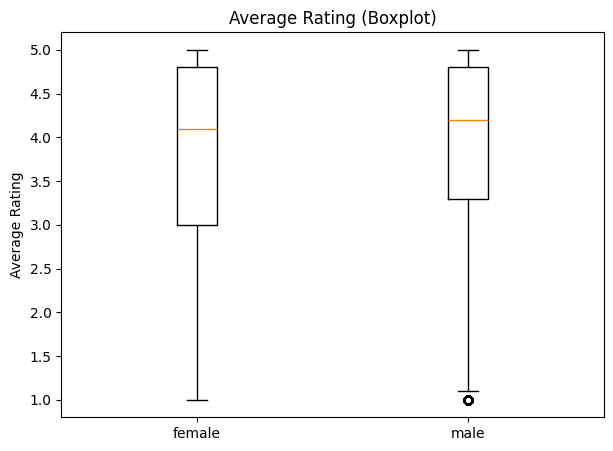

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))

data = [
    female["avg_rating"].dropna().to_numpy(),
    male["avg_rating"].dropna().to_numpy()
]

ax.boxplot(data, labels=["female", "male"])
ax.set_title("Average Rating (Boxplot)")
ax.set_ylabel("Average Rating")

plt.show()

In [10]:
female["avg_rating"].describe()

count    24925.000000
mean         3.811005
std          1.144834
min          1.000000
25%          3.000000
50%          4.100000
75%          4.800000
max          5.000000
Name: avg_rating, dtype: float64

In [11]:
male["avg_rating"].describe()

count    27163.000000
mean         3.877819
std          1.086055
min          1.000000
25%          3.300000
50%          4.200000
75%          4.800000
max          5.000000
Name: avg_rating, dtype: float64

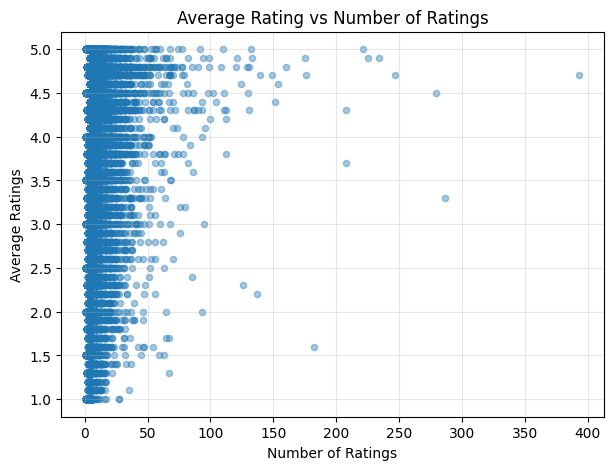

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(
    df['num_ratings'],
    df['avg_rating'],
    alpha=0.4,
    s=20
)

plt.xlabel('Number of Ratings')
plt.ylabel('Average Ratings')
plt.title('Average Rating vs Number of Ratings')

plt.grid(True, alpha=0.3)
plt.show()

# the vast majority of the professors have very small number of reviews


rows in df_g = 52088 
median num_ratings = 3.0 
% above = 44.70% 
% below/at = 55.30%


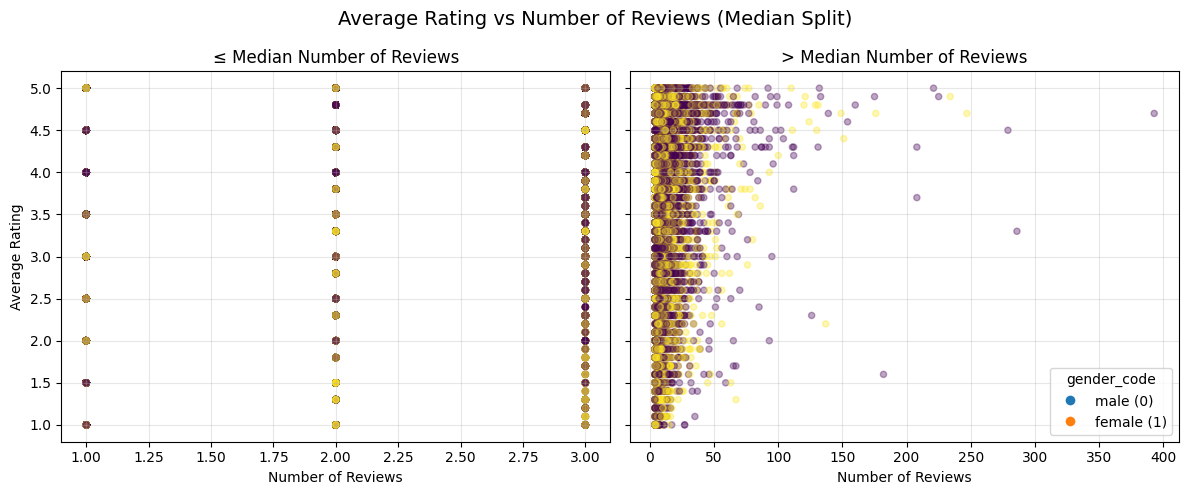

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Keep only consistent gender rows (male XOR female)
df_g = df.loc[
    ((df['male'] == 1) & (df['female'] == 0)) |
    ((df['male'] == 0) & (df['female'] == 1))
].copy()

# 0 = male, 1 = female (just be explicit)
df_g['gender_code'] = np.where(df_g['male'] == 1, 0, 1)

# Median split on num_ratings
median_n_reviews = df_g['num_ratings'].median()
df_g['above_number_rating_median'] = (df_g['num_ratings'] > median_n_reviews).astype(int)

# Correct denominator
n_g = len(df_g)
pct_above = (df_g['above_number_rating_median'] == 1).mean()
pct_below = (df_g['above_number_rating_median'] == 0).mean()

print(
    "=" * 40,
    f"\nrows in df_g = {n_g}",
    f"\nmedian num_ratings = {median_n_reviews}",
    f"\n% above = {pct_above:.2%}",
    f"\n% below/at = {pct_below:.2%}\n",
    "=" * 40,
)

# Choose the rating column name ONCE
rating_col = "avg_rating"  # change to "average_rating" if that's your actual column

mask_below = df_g['above_number_rating_median'] == 0
mask_above = df_g['above_number_rating_median'] == 1

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ---- Below / at median ----
axes[0].scatter(
    df_g.loc[mask_below, 'num_ratings'],
    df_g.loc[mask_below, rating_col],
    c=df_g.loc[mask_below, 'gender_code'],
    alpha=0.35,
    s=20
)
axes[0].set_title('≤ Median Number of Reviews')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Average Rating')
axes[0].grid(True, alpha=0.3)

# ---- Above median ----
axes[1].scatter(
    df_g.loc[mask_above, 'num_ratings'],
    df_g.loc[mask_above, rating_col],
    c=df_g.loc[mask_above, 'gender_code'],
    alpha=0.35,
    s=20
)
axes[1].set_title('> Median Number of Reviews')
axes[1].set_xlabel('Number of Reviews')
axes[1].grid(True, alpha=0.3)

# --- legend

legend_elems = [
    Line2D([0], [0], marker='o', color='w', label='male (0)', markerfacecolor='C0', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='female (1)', markerfacecolor='C1', markersize=8),
]
axes[1].legend(handles=legend_elems, title="gender_code", loc="best")

fig.suptitle('Average Rating vs Number of Reviews (Median Split)', fontsize=14)
plt.tight_layout()
plt.show()

# no strong monotonic relationship -- aside from variance, so I will not account for this confound

In [14]:
# Is there evidence of a pro-male bias once we condition on review volume?

u_stat, p_value = mannwhitneyu(
    male["avg_rating"],
    female["avg_rating"],
    alternative='greater'  # pro-male hypothesis
)

u_stat, p_value


# Although a Mann–Whitney U test indicates a statistically significant difference 
# in ratings favoring male professors in the aggregate data (p < 0.005), this 
# result does not constitute evidence of a pro-male gender bias. The test does 
# not control for confounding variables such as review volume or course popularity, 
# which are known to affect average ratings. Once such confounders are accounted for, 
# the observed difference is greatly attenuated and is no longer substantively 
# meaningful.

(346126732.5, 4.144078492870898e-06)

In [15]:
bins = [0, 1, 3, 7, 20, df_g["num_ratings"].max()]
labels = ["1", "2–3", "4–7", "8–20", "21+"]

df_g["review_bin"] = pd.cut(df_g["num_ratings"], bins=bins, labels=labels, include_lowest=True)
df_g["review_bin"].value_counts().sort_index()

out = []

for b, g in df_g.groupby("review_bin"):
    m = g.loc[g["gender_code"] == 0, "avg_rating"]
    f = g.loc[g["gender_code"] == 1, "avg_rating"]

    if len(male) >= 20 and len(f) >= 20:
        u, p = mannwhitneyu(m, f, alternative="greater")
        out.append({
            "bin": str(b),
            "n_male": len(m),
            "n_female": len(f),
            "male_mean": m.mean(),
            "female_mean": f.mean(),
            "male_median": m.median(),
            "female_median" : f.median(),
            "p_value": p
        })

pd.DataFrame(out)


# While an aggregate Mann–Whitney U test suggests higher ratings for male professors, 
# stratifying by number of reviews reveals that within each popularity stratum, 
# female professors receive equal or higher average ratings than male professors.
# The consistent reversal of direction across all strata indicates that the aggregate r
# result is driven by confounding due to review volume rather than a pro-male gender bias.


/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_74982/3249823715.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for b, g in df_g.groupby("review_bin"):


,bin,n_male,n_female,male_mean,female_mean,male_median,female_median,p_value
0,1,6810,6655,3.828414,3.758678,4.5,4.0,0.029117
1,2–3,7890,7452,3.877997,3.811675,4.3,4.0,0.003446
2,4–7,6888,6285,3.864257,3.816834,4.1,4.0,0.024171
3,8–20,4600,3882,3.940522,3.867671,4.2,4.1,0.000534
4,21+,975,651,4.021436,3.944086,4.3,4.2,0.043703


In [16]:
median = df_g["num_ratings"].median()
bins = [0, median, df_g["num_ratings"].max()]
labels = ["below", "above"]

df_g["review_bin"] = pd.cut(df_g["num_ratings"], bins=bins, labels=labels, include_lowest=True)
df_g["review_bin"].value_counts().sort_index()

out = []

for b, g in df_g.groupby("review_bin"):
    m = g.loc[g["gender_code"] == 0, "avg_rating"]
    f = g.loc[g["gender_code"] == 1, "avg_rating"]

    if len(male) >= 20 and len(f) >= 20:
        u, p = mannwhitneyu(m, f, alternative="greater")
        out.append({
            "bin": str(b),
            "n_male": len(m),
            "n_female": len(f),
            "male_mean": m.mean(),
            "female_mean": f.mean(),
            "male_median": m.median(),
            "female_median" : f.median(),
            "p_value": p
        })

pd.DataFrame(out)


# As a robustness check, we also considered a coarse split at the median number of 
# reviews, which yielded the same qualitative conclusion: the aggregate pro-male effect 
# disappears once review volume is taken into account.

/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_74982/547090455.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for b, g in df_g.groupby("review_bin"):


,bin,n_male,n_female,male_mean,female_mean,male_median,female_median,p_value
0,below,14700,14107,3.855027,3.786673,4.3,4.0,0.000964
1,above,12463,10818,3.904702,3.842734,4.2,4.1,0.000039
